<a href="https://colab.research.google.com/github/JaimeOcean/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Exa_Jaime_DS_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [76]:
import pandas as pd
cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--cell_phones_total--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv')
geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))


In [77]:
geo_country_codes = geo_country_codes[['geo','country']]

In [78]:
print(cell_phones.shape)
cell_phones.head()

(9427, 3)


,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [79]:
print(population.shape)
population.head()

(59297, 3)


,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


Check for missing/null values in the three dataframes

In [80]:
cell_phones.isnull().sum()

geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [81]:
population.isnull().sum()

geo                 0
time                0
population_total    0
dtype: int64

In [82]:
geo_country_codes.isnull().sum()

geo        0
country    0
dtype: int64

In [83]:
merged1 = pd.merge(cell_phones, population)
print(merged1.shape)
merged1.head()

(8786, 4)


,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996967
1,afg,1965,0.0,9956318
2,afg,1970,0.0,11173654
3,afg,1975,0.0,12689164
4,afg,1976,0.0,12943093


Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phones_total"

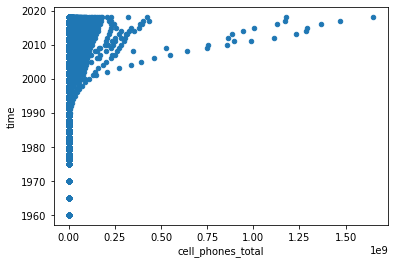

In [84]:
cell_phones.plot.scatter('cell_phones_total', 'time')

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [85]:
print(cell_phones.shape)
cell_phones.head()

(9427, 3)


,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [86]:
print(population.shape)
population.head()

(59297, 3)


,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [87]:
cell_phone_population = pd.merge(cell_phones,population,on=["geo", "time"],how="inner")
cell_phone_population

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996967
1,afg,1965,0.0,9956318
2,afg,1970,0.0,11173654
3,afg,1975,0.0,12689164
4,afg,1976,0.0,12943093
...,...,...,...,...
8781,zwe,2014,11798652.0,13586710
8782,zwe,2015,12757410.0,13814642
8783,zwe,2016,12878926.0,14030338
8784,zwe,2017,14092104.0,14236599


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [88]:
merged1 = pd.merge(cell_phones, population)
print(merged1.shape)
merged1.head()

(8786, 4)


,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996967
1,afg,1965,0.0,9956318
2,afg,1970,0.0,11173654
3,afg,1975,0.0,12689164
4,afg,1976,0.0,12943093


In [89]:
print(geo_country_codes.shape)
geo_country_codes.head()

(273, 2)


,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla


In [90]:
df = pd.merge(merged1, geo_country_codes[['geo', 'country']])
print(df.shape)
df.head()

(8786, 5)


,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996967,Afghanistan
1,afg,1965,0.0,9956318,Afghanistan
2,afg,1970,0.0,11173654,Afghanistan
3,afg,1975,0.0,12689164,Afghanistan
4,afg,1976,0.0,12943093,Afghanistan


In [91]:
#Take a look on new data frame provided last minute it has more information, I tried several times it does not match (8590, 5) result

### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [92]:
cell_phone_population_geo['cell_phones_per_person']

0         0
1         0
2         0
3         0
4         0
         ..
403455    0
403456    0
403457    0
403458    0
403459    0
Name: cell_phones_per_person, Length: 403460, dtype: int64

In [93]:
cell_phone_population_geo.head()

,geo,time_x,cell_phones_total_x,population_total,time_y,cell_phones_total_y,cell_phones_per_person
0,afg,1960,0.0,8996967,1960,0.0,0
1,afg,1960,0.0,8996967,1965,0.0,0
2,afg,1960,0.0,8996967,1970,0.0,0
3,afg,1960,0.0,8996967,1975,0.0,0
4,afg,1960,0.0,8996967,1976,0.0,0


In [94]:
cell_phone_population_geo.tail()

,geo,time_x,cell_phones_total_x,population_total,time_y,cell_phones_total_y,cell_phones_per_person
403455,zwe,2018,12908992.0,14438812,2014,11798652.0,0
403456,zwe,2018,12908992.0,14438812,2015,12757410.0,0
403457,zwe,2018,12908992.0,14438812,2016,12878926.0,0
403458,zwe,2018,12908992.0,14438812,2017,14092104.0,0
403459,zwe,2018,12908992.0,14438812,2018,12908992.0,0


In [95]:
cell_phone_population_geo['geo'].unique()

array(['afg', 'ago', 'alb', 'and', 'are', 'arg', 'arm', 'atg', 'aus',
       'aut', 'aze', 'bdi', 'bel', 'ben', 'bfa', 'bgd', 'bgr', 'bhr',
       'bhs', 'bih', 'blr', 'blz', 'bol', 'bra', 'brb', 'brn', 'btn',
       'bwa', 'caf', 'can', 'che', 'chl', 'chn', 'civ', 'cmr', 'cod',
       'cog', 'col', 'com', 'cpv', 'cri', 'cub', 'cyp', 'cze', 'deu',
       'dji', 'dma', 'dnk', 'dom', 'dza', 'ecu', 'egy', 'eri', 'esp',
       'est', 'eth', 'fin', 'fji', 'fra', 'fsm', 'gab', 'gbr', 'geo',
       'gha', 'gin', 'gmb', 'gnb', 'gnq', 'grc', 'grd', 'gtm', 'guy',
       'hkg', 'hnd', 'hrv', 'hti', 'hun', 'idn', 'ind', 'irl', 'irn',
       'irq', 'isl', 'isr', 'ita', 'jam', 'jor', 'jpn', 'kaz', 'ken',
       'kgz', 'khm', 'kir', 'kna', 'kor', 'kwt', 'lao', 'lbn', 'lbr',
       'lby', 'lca', 'lie', 'lka', 'lso', 'ltu', 'lux', 'lva', 'mar',
       'mco', 'mda', 'mdg', 'mdv', 'mex', 'mhl', 'mkd', 'mli', 'mlt',
       'mmr', 'mne', 'mng', 'moz', 'mrt', 'mus', 'mwi', 'mys', 'nam',
       'ner', 'nga',

In [144]:
df = pd.merge(merged1, geo_country_codes[['geo', 'country']])
print(df.shape)
df.head()

(8786, 5)


,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996967,Afghanistan
1,afg,1965,0.0,9956318,Afghanistan
2,afg,1970,0.0,11173654,Afghanistan
3,afg,1975,0.0,12689164,Afghanistan
4,afg,1976,0.0,12943093,Afghanistan


In [145]:
df['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [131]:
#df.loc[['country'] == 'United States','2017']

In [132]:
cell_phone_population_geo

,geo,time_x,cell_phones_total_x,population_total,time_y,cell_phones_total_y,cell_phones_per_person
0,afg,1960,0.0,8996967,1960,0.0,0
1,afg,1960,0.0,8996967,1965,0.0,0
2,afg,1960,0.0,8996967,1970,0.0,0
3,afg,1960,0.0,8996967,1975,0.0,0
4,afg,1960,0.0,8996967,1976,0.0,0
...,...,...,...,...,...,...,...
403455,zwe,2018,"12,908,992.0",14438812,2014,"11,798,652.0",0
403456,zwe,2018,"12,908,992.0",14438812,2015,"12,757,410.0",0
403457,zwe,2018,"12,908,992.0",14438812,2016,"12,878,926.0",0
403458,zwe,2018,"12,908,992.0",14438812,2017,"14,092,104.0",0


In [146]:
#cell_phone_population_geo['country'].value_counts.sort_index()

In [185]:
cell_phone_population_geo.tail(21700)

,geo,time_x,cell_phones_total_x,population_total,time_y,cell_phones_total_y,cell_phones_per_person
381760,usa,2017,"400,000,000.0",325084758,2000,"109,478,031.0",0
381761,usa,2017,"400,000,000.0",325084758,2001,"128,500,000.0",0
381762,usa,2017,"400,000,000.0",325084758,2002,"141,800,000.0",0
381763,usa,2017,"400,000,000.0",325084758,2003,"160,637,000.0",0
381764,usa,2017,"400,000,000.0",325084758,2004,"184,819,000.0",0
...,...,...,...,...,...,...,...
403455,zwe,2018,"12,908,992.0",14438812,2014,"11,798,652.0",0
403456,zwe,2018,"12,908,992.0",14438812,2015,"12,757,410.0",0
403457,zwe,2018,"12,908,992.0",14438812,2016,"12,878,926.0",0
403458,zwe,2018,"12,908,992.0",14438812,2017,"14,092,104.0",0


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [110]:
cell_phone_population_geo.geo.describe()

count     403460
unique       195
top          slb
freq        2209
Name: geo, dtype: object

In [111]:
cell_phone_population_geo.describe()

,time_x,cell_phones_total_x,population_total,time_y,cell_phones_total_y,cell_phones_per_person
count,403460.000000,4.034600e+05,4.034600e+05,403460.000000,4.034600e+05,403460.0
mean,1994.569296,9.809370e+06,3.050032e+07,1994.569296,9.809370e+06,0.0
std,14.520678,6.026372e+07,1.184969e+08,14.520678,6.026372e+07,0.0
min,1960.000000,0.000000e+00,4.377000e+03,1960.000000,0.000000e+00,0.0
25%,1983.000000,0.000000e+00,1.592437e+06,1983.000000,0.000000e+00,0.0
50%,1995.000000,7.500000e+03,5.962139e+06,1995.000000,7.500000e+03,0.0
75%,2007.000000,2.009757e+06,1.862009e+07,2007.000000,2.009757e+06,0.0
max,2018.000000,1.649302e+09,1.427648e+09,2018.000000,1.649302e+09,0.0


In [112]:
cell_phone_population_geo.population_total.describe()

count    4.034600e+05
mean     3.050032e+07
std      1.184969e+08
min      4.377000e+03
25%      1.592437e+06
50%      5.962139e+06
75%      1.862009e+07
max      1.427648e+09
Name: population_total, dtype: float64

In [114]:
cell_phone_population_geo.describe(exclude='number')

,geo
count,403460
unique,195
top,slb
freq,2209


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [117]:
pd.options.display.float_format = '{:,}'.format

In [118]:
def highest_phone_count(country):
  for country in df['country']:
    return df.loc['cell_phones_total']

In [119]:
largest_cell_total = df[df['cell_phones_total'] >= 236488548]
largest_cell_total.groupby(df['country']).head()

,geo,time,cell_phones_total,population_total,country,cphones_per_person
1103,bra,2012,"248,323,703.0",199287292,Brazil,1.2460588957172443
1104,bra,2013,"271,099,799.0",201035904,Brazil,1.3485143380159597
1105,bra,2014,"280,728,796.0",202763744,Brazil,1.3845117991113836
1106,bra,2015,"257,814,274.0",204471759,Brazil,1.2608796210336313
1107,bra,2016,"244,067,356.0",206163056,Brazil,1.18385592809606
1516,chn,2003,"269,953,000.0",1315303522,China,0.2052400799395107
1517,chn,2004,"334,824,000.0",1323084639,China,0.2530631753483762
1518,chn,2005,"393,406,000.0",1330776380,China,0.29562141762690436
1519,chn,2006,"461,058,000.0",1338408644,China,0.3444822342315954
1520,chn,2007,"547,306,000.0",1345993891,China,0.4066184873940115


In [121]:
# Brazil, China, Indonisia, Russia, and USA

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.087352138307552,1.1074918566775243
2019-04-28,3.707641196013288,1.2958199356913183
2019-05-05,2.805168986083499,1.3061224489795922
2019-05-12,3.235849056603773,1.0453857791225416
2019-05-19,2.4946236559139785,1.1195876288659792


### Part 1 — Recreate this explanatory visualization:



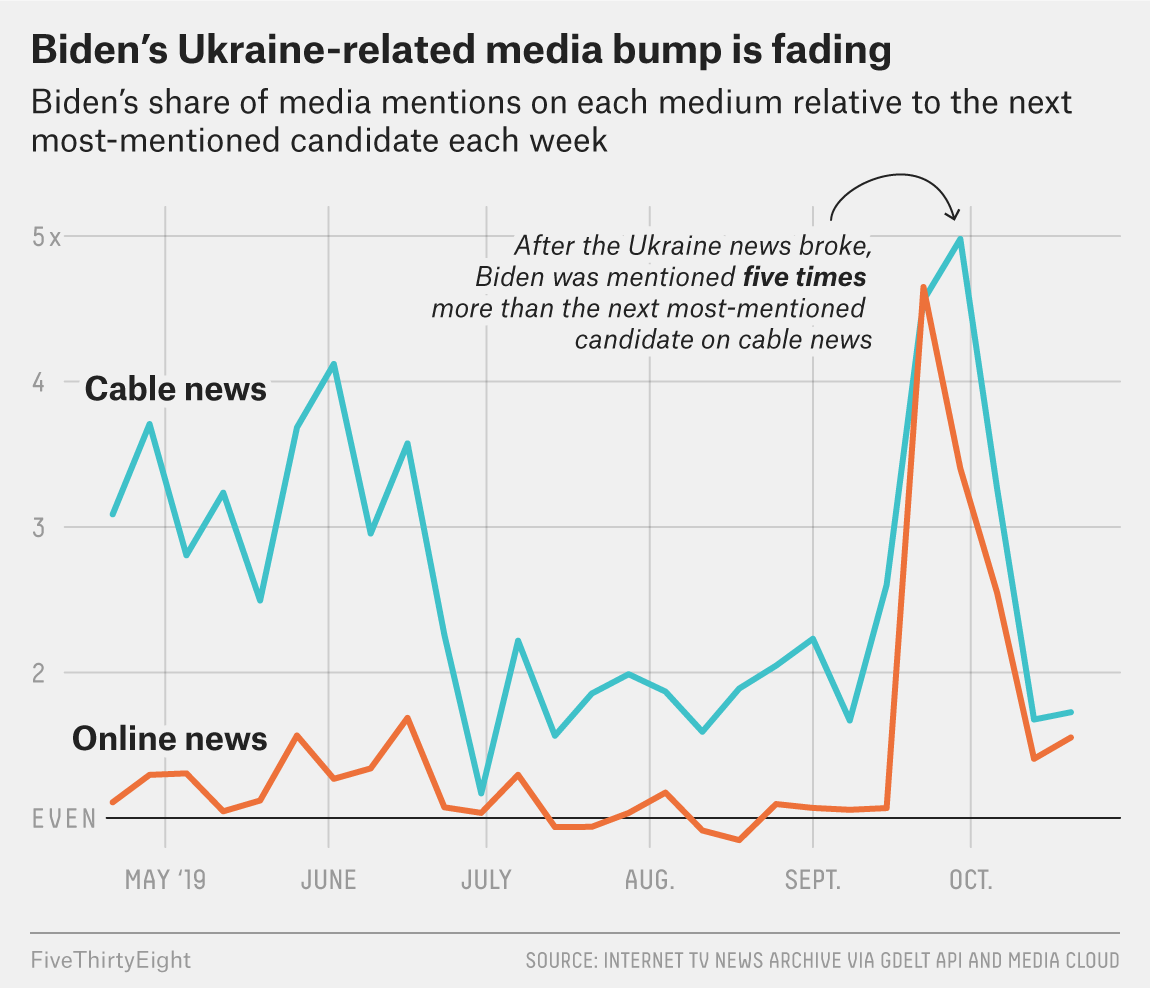

In [123]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 2 lines visualizing the Cable news vs Online news lines The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Biden's Ukraine-related media bump is fading"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Biden's share of media mentions on each medium relative ot the next most-mentioned candidate each week"_

In [125]:
df.head(10)

,biden_cable_multiple,biden_online_multiple
date,,
2018-12-30,0.2454923717059639,0.3566591422121897
2019-01-06,0.43160377358490565,0.49240121580547114
2019-01-13,0.9904761904761904,0.36
2019-01-20,0.42349726775956287,0.44075829383886256
2019-01-27,0.20441988950276246,0.2747524752475248
2019-02-03,0.2765957446808511,0.3344709897610922
2019-02-10,0.3758241758241758,0.3357664233576642
2019-02-17,0.3051010587102983,0.33175355450236965
2019-02-24,0.4262048192771084,0.31687898089171973


In [127]:
pd.crosstab(df['biden_cable_multiple'], df['biden_online_multiple'])

biden_online_multiple,0.2747524752475248,0.31687898089171973,0.33175355450236965,0.3344709897610922,0.3357664233576642,0.3566591422121897,0.36,0.3771186440677967,0.4257871064467766,0.44075829383886256,0.4779874213836478,0.49240121580547114,0.6327212020033388,0.6527545909849751,0.7842105263157895,0.8472440944881888,0.9136276391554701,0.9369747899159663,0.9386503067484663,1.0339734121122601,1.0343461030383092,1.0453857791225416,1.0557308096740272,1.0675057208237988,1.0684410646387832,1.0727891156462586,1.0952380952380953,1.1074918566775243,1.1195876288659792,1.1739837398373982,1.2685810810810811,1.2958199356913183,1.296041308089501,1.3061224489795922,1.3402328589909447,1.406303236797274,1.5527704485488127,1.5664335664335662,1.6878048780487804,1.7831094049904033,2.545722713864307,3.4023591087811274,4.649776453055141
biden_cable_multiple,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.20441988950276246,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.2454923717059639,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.2765957446808511,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.3051010587102983,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.3758241758241758,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.42349726775956287,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.4262048192771084,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.43160377358490565,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.5010309278350514,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
df['biden_cable_multiple'].value_counts()

4.98018018018018       1
0.3051010587102983     1
0.3758241758241758     1
2.2182361733931244     1
0.2765957446808511     1
0.2454923717059639     1
2.601589103291714      1
3.2602291325695583     1
0.42349726775956287    1
0.20441988950276246    1
1.8893229166666667     1
1.8685185185185187     1
2.4946236559139785     1
1.6761904761904765     1
1.98806860551827       1
3.235849056603773      1
2.955257270693512      1
2.2583537082314584     1
3.6842105263157894     1
1.1686153846153846     1
4.5582329317269075     1
0.9904761904761904     1
1.565040650406504      1
2.2316715542521988     1
0.6927710843373495     1
4.8820326678765875     1
3.707641196013288      1
1.2588235294117647     1
0.5010309278350514     1
0.6919540229885057     1
3.5747126436781613     1
3.087352138307552      1
2.046753246753247      1
0.4262048192771084     1
0.8445297504798464     1
1.8550724637681162     1
1.6697502312673451     1
1.726507713884993      1
0.43160377358490565    1
4.120772946859903      1


## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, etc. 

If you have already completed everything else, take this as far as you can within the time limit.
